In [ ]:
# # mount google drive to colab
# from google.colab import drive
# import os
# n=20
# drive.mount('/content/drive')
# print("#" * n)

# # change working directory
# print("### colabs default working directory")

# print("###\n### path: {}".format(os.getcwd()))
# print("#" * n)
# print("### setted working directory")

# %cd drive/Shareddrives/MADS_Milestone2/


# print("###\n### {}".format(os.getcwd()))
# print("#" * n)

# !pip install csrgraph

##Local runtime

In [ ]:
cd "C:\Users\corsi\OneDrive - Umich\milestone_2"

C:\Users\corsi\OneDrive - Umich\milestone_2


In [ ]:
!pip install -r requirements.txt

You should consider upgrading via the 'c:\users\corsi\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [ ]:
cd "G:\Shared drives\MADS_Milestone2"

G:\Shared drives\MADS_Milestone2


In [ ]:
# pip install tbb -U


In [ ]:
import csrgraph as cg
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("res/INTEGRATED_FINAL_NETWORK.csv")

c:\users\corsi\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,12,14,15,16,19,22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
df.head()

,node1,node2,node1_name,node2_name,node1_type,node2_type,node1_type_orig,node2_type_orig,node1_color,node1_shape,...,blackBoxWarning,drugType,ActionType_drug__filter,tradeNames,hasBeenWithdrawn,isApproved,withdrawnNotice,yearOfFirstApproval,maximumClinicalTrialPhase,DrugTargetType_drug__filter
0,381,375,ARF5,ARF1,protein,disease_related_protein,protein,protein,blue,o,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,381,9727,ARF5,RAB11FIP3,protein,protein,protein,protein,blue,o,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,381,2108,ARF5,ETFA,protein,disease_related_protein,protein,protein,blue,o,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,381,23647,ARF5,ARFIP2,protein,protein,protein,protein,blue,o,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4074,26088,M6PR,GGA1,disease_related_protein,disease_related_protein,protein,protein,red,o,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
drug_nodes = list(df[df['node1_type'] == 'drug']['node1'].unique())
disease_nodes = list(df[df['node2_type'] == 'disease']['node2'].unique())

In [ ]:
G = nx.from_pandas_edgelist(df, 'node1', 'node2')
Gc = max(nx.connected_components(G), key=len) #get largest connected component

Gx = cg.csrgraph(G.subgraph(Gc), threads=0) 
node_names = Gx.names

''' below needed to convert to graph indices to be used as input
    starting nodes for walks'''

drug_nodes_indices = []
for i in drug_nodes:
  for idx, node in enumerate(node_names):
    if i == node:
      drug_nodes_indices.append(idx)


# disease_nodes_indices = [] # only needed if we are starting the walks from disease nodes
# for i in disease_nodes:
#   for idx, node in enumerate(node_names):
#     if i == node:
#       disease_nodes_indices.append(idx)

# Sample Test- not necessary to run

In [ ]:

# walks = Gx.random_walks(walklen=150, # length of the walks
#                 epochs=1, # how many times to start a walk from each node
#                 start_nodes=drug_nodes_indices, # the starting node as index not node name. It is either a list (e.g., [2,3]) or None. If None it does it on all nodes and returns epochs*G.number_of_nodes() walks
#                 return_weight=50, # return to previous node ?
#                 neighbor_weight=5000)

In [ ]:
# walks = np.vectorize(lambda x: node_names[x])(walks) # map to original node names


In [ ]:
# len(walks)

In [ ]:
# counter = 0
# for i in walks:
#   if set(i).intersection(disease_nodes):
#     counter+=1

# print(f'''These walks began from drug nodes. The total number of walks was {len(walks)} and the number of walks that reached
#  a disease node was {counter} or {round(counter/len(walks),3)}''')


## Testing parameters for walks (don't re-run every time not needed)

In [ ]:
# terminal_df_dict = {}

# row = 0
# for z in range(10,300, 10):
#   return_weight=0.2 
#   neighbor_weight=1000
#   walks = Gx.random_walks(walklen=z, # length of the walks
#                 epochs=1, # how many times to start a walk from each node
#                 start_nodes=drug_nodes_indices, # the starting node as index not node name. It is either a list (e.g., [2,3]) or None. If None it does it on all nodes and returns epochs*G.number_of_nodes() walks
#                 return_weight=return_weight, # return to previous node ?
#                 neighbor_weight=neighbor_weight)
  
#   walks = np.vectorize(lambda x: node_names[x])(walks) # map to original node names

#   counter = 0
#   for i in walks:
#     if set(i).intersection(disease_nodes):
#       counter+=1

#   terminal_df_dict[row] = {'%_terminal_nodes':round(counter/len(walks),2),'walk_len':z, 'return_weight':return_weight, 'neighbor_weight':neighbor_weight}
#   row+=1

In [ ]:
# terminal_df = pd.DataFrame([v for k,v in terminal_df_dict.items()], columns = terminal_df_dict[0].keys())

# plt.plot(terminal_df['walk_len'],terminal_df['%_terminal_nodes'] )
# plt.xlabel('walk length')
# plt.ylabel('% nodes reached terminal node')
# plt.title('Adjusting Walk Length')
# plt.show()

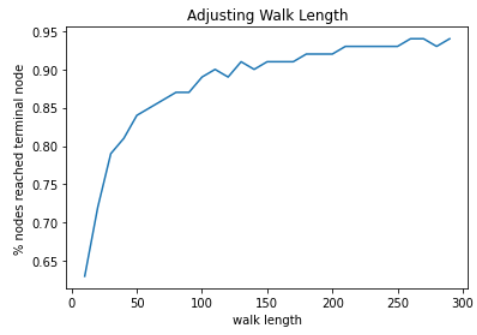

In [ ]:
# terminal_df_dict = {}

# row = 0
# for z in range(0,500, 50):
#   return_weight=0.2 
#   neighbor_weight=1000
#   walklen = 150
#   walks = Gx.random_walks(walklen=walklen, # length of the walks
#                 epochs=1, # how many times to start a walk from each node
#                 start_nodes=drug_nodes_indices, # the starting node as index not node name. It is either a list (e.g., [2,3]) or None. If None it does it on all nodes and returns epochs*G.number_of_nodes() walks
#                 return_weight=z, # return to previous node ?
#                 neighbor_weight=neighbor_weight)
  
#   walks = np.vectorize(lambda x: node_names[x])(walks) # map to original node names

#   counter = 0
#   for i in walks:
#     if set(i).intersection(disease_nodes):
#       counter+=1

#   terminal_df_dict[row] = {'%_terminal_nodes':round(counter/len(walks),2),'walk_len':walklen, 'return_weight':z, 'neighbor_weight':neighbor_weight}
#   row+=1

In [ ]:
# terminal_df = pd.DataFrame([v for k,v in terminal_df_dict.items()], columns = terminal_df_dict[0].keys())

# plt.plot(terminal_df['return_weight'],terminal_df['%_terminal_nodes'] )
# plt.xlabel('return weight')
# plt.ylabel('% nodes reached terminal node')
# plt.title('Adjusting Return Weight')
# plt.show()

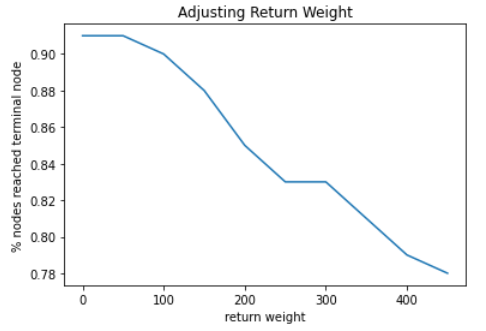

In [ ]:
# terminal_df_dict = {}

# row = 0
# for z in range(0,2000, 100):
#   return_weight=50 
#   neighbor_weight=z
#   walklen = 150
#   walks = Gx.random_walks(walklen=walklen, # length of the walks
#                 epochs=1, # how many times to start a walk from each node
#                 start_nodes=drug_nodes_indices, # the starting node as index not node name. It is either a list (e.g., [2,3]) or None. If None it does it on all nodes and returns epochs*G.number_of_nodes() walks
#                 return_weight=return_weight, # return to previous node ?
#                 neighbor_weight=z)
  
#   walks = np.vectorize(lambda x: node_names[x])(walks) # map to original node names

#   counter = 0
#   for i in walks:
#     if set(i).intersection(disease_nodes):
#       counter+=1

#   terminal_df_dict[row] = {'%_terminal_nodes':round(counter/len(walks),2),'walk_len':walklen, 'return_weight':return_weight, 'neighbor_weight':z}
#   row+=1

In [ ]:
# terminal_df = pd.DataFrame([v for k,v in terminal_df_dict.items()], columns = terminal_df_dict[0].keys())

# plt.plot(terminal_df['neighbor_weight'],terminal_df['%_terminal_nodes'] )
# plt.xlabel('neighbor weight')
# plt.ylabel('% nodes reached terminal node')
# plt.title('Adjusting Neighbor Weight')
# plt.show()

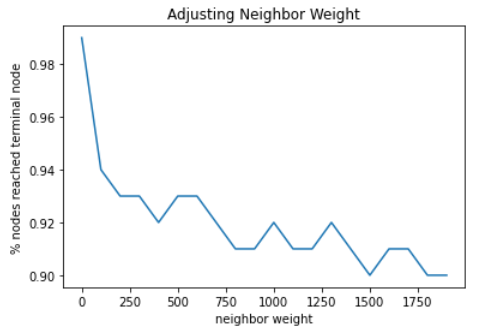

## Fit count vectorizer with node names as the vocab

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

all_nodes = list(G.subgraph(Gc).nodes) # nodes only in largest connected component
all_nodes = [str(i).strip() for i in all_nodes]

vectorizer = CountVectorizer(stop_words=[], vocabulary=set(all_nodes), lowercase=False) # need to set up like this as a trick to include nodes that are one character and not lowercase
vectorizer.fit(set(all_nodes), ) #all nodes
len(set(all_nodes))

27516

In [ ]:
# walk1 = np.sum(vectorizer.transform(walks[1]),axis=0)
# walk2 = np.sum(vectorizer.transform(walks[2]),axis=0)
# walk5000 =  np.sum(vectorizer.transform(walks[2000]),axis=0)

In [ ]:
# from scipy import spatial
# result = 1 - spatial.distance.cosine(walk1,walk5000)

In [ ]:
# result

function for
*   find last node where it landed on disease node
*   consider that not every path reaches disease node

function for
*   vectorize path, 
*   optionally shorten list to include everything up to last night
*   apply averaging function or keep raw counts, 


function for
*   converting path to nodes for better intrepretability
*   optionally shorten list to include everything up to last night

To do
*   functions for comparing walks
*   functions for batch processing ?
*   functions for looking up node info? Drug/disease name, Indication class, node type, etc.
* we could add a function for training the vectorizer instead of doing it globally in the notebook. 



In [ ]:

def last_node_index(walk, end_nodes=disease_nodes):
  '''Function to find the index of when a path reaches
  a drug or disease node terminus. This is to be used if
  only the path up to the terminus node is to be considered'''

  if  not set(walk).intersection(disease_nodes):
    return None # path did not reach a terminal node

  else:
    for idx, val in enumerate(walk):
      if val in set(disease_nodes): # returns after first terminus node encountered
        return idx


def do_walks(starting_node, walk_length=500, iterations=100, return_weight=0.2, neighbor_weight=1000):
  '''run the random walk for a specified node
    nodes must be specified as indices in starting
    nodes'''

  walks = Gx.random_walks(walklen=walk_length, # length of the walks
                  epochs=iterations, # how many times to start a walk from each node
                  start_nodes=starting_node, # the starting node as index not node name. It is either a list (e.g., [2,3]) or None. If None it does it on all nodes and returns epochs*G.number_of_nodes() walks
                  return_weight=return_weight, # return to previous node ?
                  neighbor_weight=neighbor_weight,
                  )
  
  return np.vectorize(lambda x: node_names[x])(walks) #convert to node names before returning


def vectorize_walks(walks, func='average', stop_at_terminal_node = 'no'):
  '''turns a batch of random walks for a particular starting node
  into a count vector. can choose to average or keep raw counts.
  walks must be converted using convert_paths first'''
  dims = len(vectorizer.get_feature_names_out()) # get count vectorizer dimensions
  mtx = np.ones(shape = (walks.shape[0], dims)) #initialize for applying function later
  
  if stop_at_terminal_node == 'yes':
    for iteration in range(0,len(walks)):
      ln = last_node_index(walks[iteration])
      try: #reached terminal node
        trunc_walk = walks[iteration][0:ln+1] #truncate to end at terminal node
        mtx[iteration] = np.sum(vectorizer.transform(trunc_walk),axis=0)

      except: #didn't reach terminal node do whole path
        mtx[iteration] = np.sum(vectorizer.transform(walks[iteration]),axis=0)
  
  else: #consider the whole walk don't stop at terminal nodes
    for iteration in range(0,len(walks)):
      mtx[iteration] = np.sum(vectorizer.transform(walks[iteration]),axis=0)

  if func == 'average':
    return  np.mean(mtx,axis=0)

  elif func == 'counts':
    return  np.sum(mtx,axis=0)

  else: # might want to add in more functions?
    return


#might not need below func baked into do_walks func return
def convert_paths(walks):
  '''convert all paths in a batch simulation to
  node paths. This is for better intrepability, but
  also need to be done prior to running vectorize_path'''

  return np.vectorize(lambda x: node_names[x])(walks) # map to original node names


## Set GPU

In [ ]:
from numba import config, njit, threading_layer
import numpy as np

# set the threading layer before any parallel target compilation
config.THREADING_LAYER = 'omp'



In [ ]:
test = do_walks(drug_nodes_indices[0])

In [ ]:
d = vectorize_walks(test, func='counts', stop_at_terminal_node='no')

In [ ]:
# list(d)

You should consider upgrading via the 'c:\users\corsi\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


## Function to create full df of results using convience functions above


In [ ]:
def create_full_network_walks(start_nodes=drug_nodes_indices, walk_length=500, iterations=100, return_weight=0.2, neighbor_weight=1000,
                              stop_at_terminal_node = 'no', func='average', ret_df='yes'):
 
  '''final function that uses all the convience functions to iterate over
  input start nodes. All parameters can be optionally changed in each call
  just like in the convience functions above'''

  from scipy import sparse
  from tqdm import tqdm

  dims = len(vectorizer.get_feature_names_out()) # get count vectorizer dimensions
  mtx = np.ones(shape = (len(start_nodes), dims)) #initialize for holding results later
  mtx = sparse.csr_matrix(mtx) #make sparse
  df_idxs = []

  for start_node, idx in tqdm(zip(start_nodes, range(0,len(start_nodes))),total=len(start_nodes)):
    walks_temp = do_walks(start_node, walk_length, iterations, return_weight, neighbor_weight)
    vectorize_temp = vectorize_walks(walks_temp, func, stop_at_terminal_node)
    mtx[idx] = vectorize_temp
    df_idxs.append(node_names[start_node])# will be used for df indexes to track node names

  df = pd.DataFrame.sparse.from_spmatrix(mtx, index= df_idxs, columns= vectorizer.get_feature_names_out())

  return df if ret_df == 'yes' else mtx # return in df format or mtx 

## Using reduced input start nodes for testing


In [ ]:
drug_nodes_indices_test  = drug_nodes_indices.copy()
#disease_nodes_indices_test = disease_nodes_indices.copy()[0:50] #only needed if starting from disease nodes

In [ ]:
# rand_df = create_full_network_walks(start_nodes= drug_nodes_indices_test, walk_length=150, iterations=100, 
#                           return_weight=0.2, neighbor_weight=1000,stop_at_terminal_node = 'no', 
#                           func='average')

## To do
* potentially remove start nodes from vectorizer features. One commment against this is that with the potential to return to previous nodes we may want to keep them. Futhermore, it also signfies the starting point, and it may not be consequential to leave them
* when training the classifier we should use the training data in sparse matrix format. This can be done my modiyfing the create_full_network_walks function to return sparse matrix instead of df
* probably want to return drug indices from create full network function for converting to names later

In [ ]:
def cosine_similarity_(mtx):

  '''calculate pairwise similarities for each walk. Input is matrix from
  create full network function'''

  from sklearn.metrics.pairwise import cosine_similarity
  from scipy import sparse

  # A =  mtx
  # A_sparse = sparse.csr_matrix(A)
  A_sparse = mtx

  similarities = cosine_similarity(A_sparse)
  # print('pairwise dense output:\n {}\n'.format(similarities))

  #also can output sparse matrices
  similarities_sparse = cosine_similarity(A_sparse,dense_output=False)
  # print('pairwise sparse output:\n {}\n'.format(similarities_sparse))

  return similarities_sparse

#def select_similar_nodes(top)

In [ ]:
mtx = create_full_network_walks(start_nodes= drug_nodes_indices_test, walk_length=150, iterations=200, 
                          return_weight=0.2, neighbor_weight=1000,stop_at_terminal_node = 'no', 
                          func='average', ret_df ='no')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 4311/4311 [2:23:24<00:00,  2.00s/it]


In [ ]:
from scipy import sparse
sparse.save_npz('no_bf_no_filter_28Dec.npz', mtx)

In [ ]:

cosine_similarity_(mtx)[0]

## Testing for convergence of top 10 k elements returned from cosine similarity of walks. Spot check for first drug

In [ ]:
#1 AVERAGE
b = cosine_similarity_(mtx)
a = np.array(b[0].todense()).ravel()
np.argsort(a)[::-1][:10]

array([   0, 1618,  310,  142,  358, 1134, 3955,  354,  746, 3385],
      dtype=int64)

In [ ]:
a = np.array(b[1].todense()).ravel()
np.argsort(a)[::-1][:10]

array([   1, 3610, 3308, 4160, 3101, 3617, 1712, 4146,  988,  394],
      dtype=int64)

In [ ]:
from sklearn.cluster import KMeans

y_pred = KMeans(n_clusters=10, random_state=22).fit_predict(mtx)

In [ ]:
from collections import Counter

In [ ]:
Counter(y_pred)

Counter({9: 3634,
         1: 309,
         4: 60,
         2: 89,
         3: 83,
         7: 17,
         5: 94,
         8: 13,
         0: 4,
         6: 8})

In [ ]:
#2 AVERAGE
b = cosine_similarity_(mtx)
a = np.array(b[0].todense()).ravel()
np.argsort(a)[::-1][:10]

In [ ]:
#3AVERAGE
b = cosine_similarity_(mtx)
a = np.array(b[0].todense()).ravel()
np.argsort(a)[::-1][:10]

In [ ]:
np.sort(a)[::-1][:10]

In [ ]:
#1 COUNT
b = cosine_similarity_(mtx)
a = np.array(b[0].todense()).ravel()
np.argsort(a)[::-1][:10]

In [ ]:
#2 COUNT
b = cosine_similarity_(mtx)
a = np.array(b[0].todense()).ravel()
np.argsort(a)[::-1][:10]

In [ ]:
#3 COUNT
b = cosine_similarity_(mtx)
a = np.array(b[0].todense()).ravel()
np.argsort(a)[::-1][:10]

In [ ]:
from scipy import sparse
sparse.csc_matrix(mtx)

In [ ]:
r = rand_df.drop(columns=[i for i in all_nodes if i in drug_nodes])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity_(sparse.csc_matrix(r.to_numpy()))

In [ ]:
b = cosine_similarity_(sparse.csc_matrix(r.to_numpy()))
a = np.array(b[0].todense()).ravel()
np.argsort(a)[::-1][:10]